# Mini-projet IA (classification) :
## Risques Cardiovasculaires

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
df = pd.read_csv('data/Cardiovascular_Diseases.csv',sep=',',low_memory=False)

In [20]:
df.head(10)

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150.0,32.66,14.54,Yes,0.0,30.0,16.0,12.0
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165.0,77.11,28.29,No,0.0,30.0,0.0,4.0
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163.0,88.45,33.47,No,4.0,12.0,3.0,16.0
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,180.0,93.44,28.73,No,0.0,30.0,30.0,8.0
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,191.0,88.45,24.37,Yes,0.0,8.0,4.0,0.0
5,Good,Within the past year,No,No,No,No,Yes,No,Yes,Male,60-64,183.0,154.22,46.11,No,0.0,12.0,12.0,12.0
6,Fair,Within the past year,Yes,Yes,No,No,No,No,Yes,Male,60-64,175.0,69.85,22.74,Yes,0.0,16.0,8.0,0.0
7,Good,Within the past year,Yes,No,No,No,No,No,Yes,Female,65-69,165.0,108.86,39.94,Yes,3.0,30.0,8.0,8.0
8,Fair,Within the past year,No,No,No,No,Yes,No,No,Female,65-69,163.0,72.57,27.46,Yes,0.0,12.0,12.0,4.0
9,Fair,Within the past year,No,No,No,No,No,Yes,Yes,Female,70-74,163.0,91.63,34.67,No,0.0,12.0,12.0,1.0


# Data understanding

In [21]:
print("Volume and dimension of the data: ", df.shape)

Volume and dimension of the data:  (308854, 19)


In [22]:
print("\nInformation about the DataFrame:")
df.info()


Information about the DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308854 entries, 0 to 308853
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   General_Health                308854 non-null  object 
 1   Checkup                       299312 non-null  object 
 2   Exercise                      299312 non-null  object 
 3   Heart_Disease                 299312 non-null  object 
 4   Skin_Cancer                   299312 non-null  object 
 5   Other_Cancer                  299312 non-null  object 
 6   Depression                    299312 non-null  object 
 7   Diabetes                      299312 non-null  object 
 8   Arthritis                     299312 non-null  object 
 9   Sex                           299312 non-null  object 
 10  Age_Category                  299312 non-null  object 
 11  Height_(cm)                   299287 non-null  float64
 12  Weight_(kg

In [23]:
print("\nDescriptive statistics of the DataFrame:")
df.describe(include="all")


Descriptive statistics of the DataFrame:


,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
count,308854,299312,299312,299312,299312,299312,299312,299312,299312,299312,299312,299287.000000,299311,299312,299312,299312.000000,299312.000000,299312.000000,299311.000000
unique,9547,5,2,2,2,2,2,2,2,2,13,NaN,524,3611,3,NaN,NaN,NaN,NaN
top,Very Good,Within the past year,Yes,No,No,No,No,No,No,Female,65-69,NaN,90.72,26.63,No,NaN,NaN,NaN,NaN
freq,107449,231520,232412,275231,270249,270415,239899,259141,202066,153867,32321,NaN,16105,3250,178100,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,170.719734,NaN,NaN,NaN,5.134111,29.858245,15.110964,6.306450
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.649743,NaN,NaN,NaN,8.222629,24.885926,14.917528,8.588447
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,91.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,163.000000,NaN,NaN,NaN,0.000000,12.000000,4.000000,2.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,170.000000,NaN,NaN,NaN,1.000000,30.000000,12.000000,4.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,178.000000,NaN,NaN,NaN,6.000000,30.000000,20.000000,8.000000


In [24]:
df.columns

Index(['General_Health', 'Checkup', 'Exercise', 'Heart_Disease', 'Skin_Cancer',
       'Other_Cancer', 'Depression', 'Diabetes', 'Arthritis', 'Sex',
       'Age_Category', 'Height_(cm)', 'Weight_(kg)', 'BMI', 'Smoking_History',
       'Alcohol_Consumption', 'Fruit_Consumption',
       'Green_Vegetables_Consumption', 'FriedPotato_Consumption'],
      dtype='object')

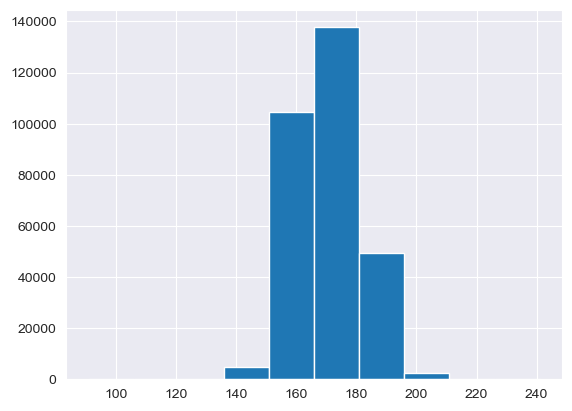

In [25]:
#Height distribution on the dataset hist 
df['Height_(cm)'].hist()
plt.show()


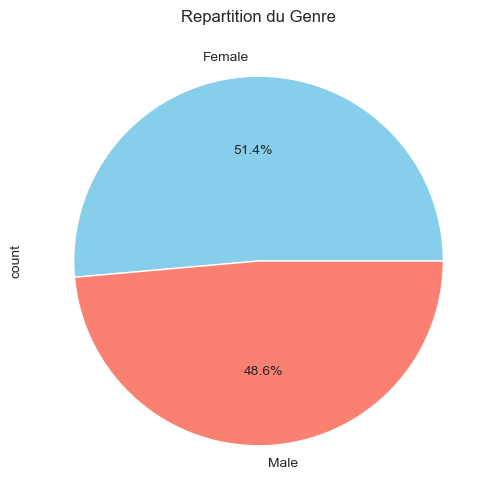

In [26]:
#Sex distribution on the dataset  as a pie chart
plt.figure(figsize=(6, 6))
df['Sex'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'salmon'])
plt.title('Repartition du Genre')
plt.show()



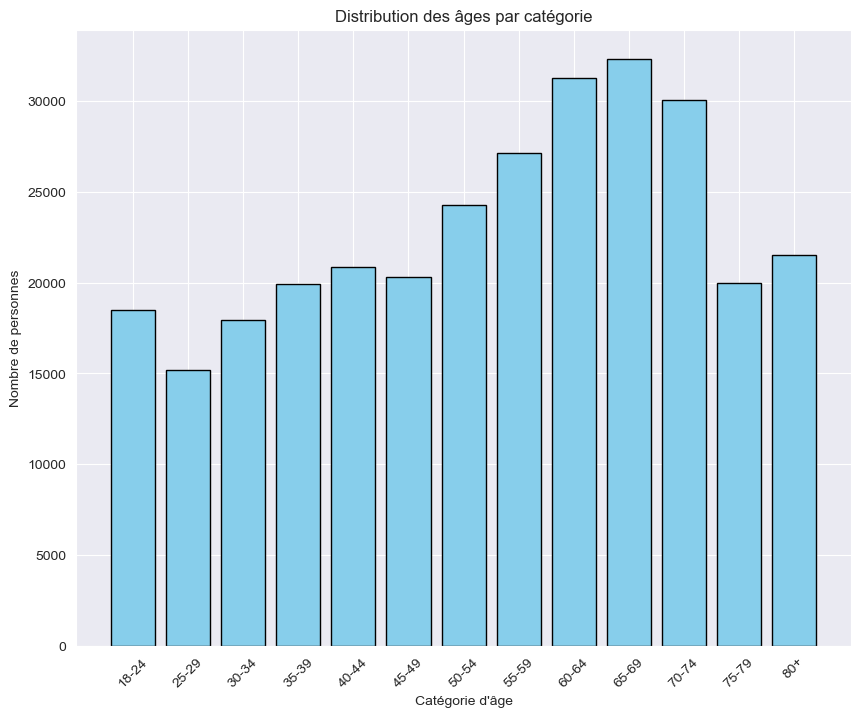

In [27]:
categories = ['18-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74', '75-79', '80+']
counts = df.Age_Category.value_counts().reindex(categories, fill_value=0)

plt.figure(figsize=(10, 8))  # Set the figure size
plt.bar(categories, counts, color='skyblue', edgecolor='black')
plt.title('Distribution des âges par catégorie')
plt.xlabel('Catégorie d\'âge')
plt.ylabel('Nombre de personnes')
plt.xticks(rotation=45)
plt.show()

In [28]:
# Calculate the percentage of heart disease for each age category
heart_disease_percentage = df.groupby('Age_Category')['Heart_Disease'].mean() * 100

# Plotting
plt.figure(figsize=(10, 8))
heart_disease_percentage.plot(kind='bar', color='tomato')
plt.title('Percentage of Heart Disease by Age Category')
plt.xlabel('Age Category')
plt.ylabel('Percentage of Heart Disease')
plt.xticks(rotation=45)
plt.show()

TypeError: agg function failed [how->mean,dtype->object]


## Research in the field has identified the following as important risk factors for heart disease:

- smoking
- diabetes
- age
- sex
- diet
- exercise
- alcohol consumption
- BMI
- Time since last checkup
- Mental Health

### Independent Variables:

1. **High Blood Pressure**:
   - **General_Health**: Indicator of overall health status, which can be correlated with blood pressure issues.

2. **High Cholesterol**:
   - **Checkup**: Frequency of medical checkups, where cholesterol levels might be assessed.

3. **BMI (Body Mass Index)**:
   - **Height_(cm)**, **Weight_(kg)**, **BMI**: Height, weight, and calculated BMI values can indicate obesity, a risk factor for heart disease.

4. **Smoking**:
   - **Smoking_History**: History of smoking, which is a well-established risk factor for heart disease.

5. **Other Chronic Health Conditions**:
   - **Skin_Cancer**, **Other_Cancer**, **Depression**, **Diabetes**, **Arthritis**: Presence of these chronic conditions, which can be associated with heart disease.

6. **Physical Activity**:
   - **Exercise**: Level of physical activity, which is inversely related to heart disease risk.

7. **Diet**:
   - **Fruit_Consumption**, **Green_Vegetables_Consumption**, **FriedPotato_Consumption**: Dietary habits that can influence heart health.

8. **Alcohol Consumption**:
   - **Alcohol_Consumption**: Frequency and quantity of alcohol consumption, which can impact heart disease risk.

9. **Health Care**:
   - **Checkup**: Time since last checkup, which can reflect access to healthcare and monitoring of health conditions.

10. **Health General and Mental Health**:
    - **General_Health**, **Depression**: Overall health perception and mental health status, which can affect heart disease risk.

11. **Demographics**:
    - **Sex**, **Age_Category**: Demographic factors such as sex and age, which are associated with heart disease risk.
    - **Height_(cm)**, **Weight_(kg)**: Additional demographic factors related to physical characteristics.



### Data Cleaning 

In [30]:
# Afficher le nombre de doublons
print("Nombre de doublons avant suppression: ", df.duplicated().sum())

# Supprimer les doublons
df= df.drop_duplicates()

# Afficher le nombre de doublons après suppression
print("Nombre de doublons après suppression: ", df.duplicated().sum())

# Afficher le nombre de valeurs manquantes pour chaque attribut
print("\nNombre de valeurs manquantes avant traitement: ")
print(df.isnull().sum())

# transform weight and height to numerical values 
df['Weight_(kg)'] = df['Weight_(kg)'].replace(' ', np.nan)
df['Height_(cm)'] = df['Height_(cm)'].replace(' ', np.nan)
df['Weight_(kg)'] = pd.to_numeric(df['Weight_(kg)'],errors='coerce')
df['Height_(cm)'] = df['Height_(cm)'].astype(float)
#recalculate the BMI 
df['BMI'] = df['Weight_(kg)'] / (df['Height_(cm)']/100)**2
#Delete the rows with missing values
df = df.dropna()
# Afficher le nombre de valeurs manquantes après traitement
print("\nNombre de valeurs manquantes après traitement: ")
print(df.isnull().sum())


Nombre de doublons avant suppression:  80
Nombre de doublons après suppression:  0

Nombre de valeurs manquantes avant traitement: 
General_Health                     0
Checkup                         9542
Exercise                        9542
Heart_Disease                   9542
Skin_Cancer                     9542
Other_Cancer                    9542
Depression                      9542
Diabetes                        9542
Arthritis                       9542
Sex                             9542
Age_Category                    9542
Height_(cm)                     9567
Weight_(kg)                     9543
BMI                             9542
Smoking_History                 9542
Alcohol_Consumption             9542
Fruit_Consumption               9542
Green_Vegetables_Consumption    9542
FriedPotato_Consumption         9543
dtype: int64


C:\Users\ezzou\AppData\Local\Temp\ipykernel_2952\3409955120.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Weight_(kg)'] = df['Weight_(kg)'].replace(' ', np.nan)
C:\Users\ezzou\AppData\Local\Temp\ipykernel_2952\3409955120.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Height_(cm)'] = df['Height_(cm)'].replace(' ', np.nan)
C:\Users\ezzou\AppData\Local\Temp\ipykernel_2952\3409955120.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using


Nombre de valeurs manquantes après traitement: 
General_Health                  0
Checkup                         0
Exercise                        0
Heart_Disease                   0
Skin_Cancer                     0
Other_Cancer                    0
Depression                      0
Diabetes                        0
Arthritis                       0
Sex                             0
Age_Category                    0
Height_(cm)                     0
Weight_(kg)                     0
BMI                             0
Smoking_History                 0
Alcohol_Consumption             0
Fruit_Consumption               0
Green_Vegetables_Consumption    0
FriedPotato_Consumption         0
dtype: int64


In [ ]:
df.head(10)

### Convert Catagorical data to numerical data 

In [ ]:
#get the unique values of the object type columns
columns_object = df.select_dtypes(include=['object']).columns
for column in columns_object:
    print(column, df[column].unique())

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for column in columns_object:
    df[column]=le.fit_transform(df[column])
    

In [ ]:
df.head(10)

In [ ]:
df.info()

In [ ]:
#check class size 
df['Heart_Disease'].value_counts()

In [ ]:
#the consuption is per month, we will convert it to per day 
df['Alcohol_Consumption'] = df['Alcohol_Consumption']/30
df['Fruit_Consumption'] = df['Fruit_Consumption']/30
df['Green_Vegetables_Consumption'] = df['Green_Vegetables_Consumption']/30
df['FriedPotato_Consumption'] = df['FriedPotato_Consumption']/30

In [ ]:
df.head(10)

In [ ]:
# Identify low variance features
from sklearn.feature_selection import VarianceThreshold

selector = VarianceThreshold(threshold=(.95 * (1 - .95)))
selector.fit_transform(df)
low_variance_columns = [df.columns[x] for x in range(len(df.columns)) if x not in selector.get_support(indices=True)]

print("Low variance columns:", low_variance_columns)

# Identify highly correlated features
corr_matrix = df.corr().abs()
high_corr_var=np.where(corr_matrix>0.9)
high_corr_var=[(corr_matrix.columns[x],corr_matrix.columns[y]) for x,y in zip(*high_corr_var) if x!=y and x<y]

print("Highly correlated columns:", high_corr_var)

In [ ]:
#The Bmi is the weight in kg divided by the square of the height in meters ,soo we can drop the weight and height columns 
df = df.drop(['Weight_(kg)', 'Height_(cm)'], axis=1)
#Apparently cancers are not a good indicator of heart disease, so we will drop them
df = df.drop(['Skin_Cancer', 'Other_Cancer'], axis=1)


In [ ]:
df.head(10)

In [ ]:
#Save the cleaned data 
df.to_csv('data/cleaned_data.csv', index=False)


In [ ]:
#Check the data balance
df['Heart_Disease'].value_counts().plot(kind='bar')


In [ ]:
#correlation matrix
corr = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".5f")
plt.show()

In [ ]:
#Show the correlation of the target with the other features
corr_target = abs(corr['Heart_Disease'])
corr_target = corr_target.sort_values(ascending=False)
print(corr_target)


## Get a balanced dataset 50-50 Randomly Selected


In [ ]:
#Seperate the 0 and 1 classes
df_0 = df[df['Heart_Disease'] == 0]
df_1 = df[df['Heart_Disease'] == 1]

In [ ]:
#Select randomly the same number of samples from the 0 class
df_0 = df_0.sample(n=len(df_1), random_state=42)

In [ ]:
#Concatenate the two classes
df_balanced = pd.concat([df_0, df_1])

In [ ]:
df_balanced['Heart_Disease'].value_counts().plot(kind='bar')

In [ ]:
df_balanced.to_csv('data/balanced_data.csv', index=False)

In [ ]:
df_balanced.head(10)

In [ ]:
#Shuffle the data
df_balanced = df_balanced.sample(frac=1).reset_index(drop=True)

In [ ]:
df_balanced.head(10)

In [ ]:
df_balanced.to_csv('data/shuffled_balanced_data.csv', index=False)

In [ ]:
df_balanced.groupby('Heart_Disease').size()

## Model Building

In [31]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, roc_curve, auc
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('data/shuffled_balanced_data.csv')

# Split the dataset
X = df.drop('Heart_Disease', axis=1)
y = df['Heart_Disease']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Define the function to evaluate the model
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d')
    plt.show()

# Define the function to plot the Precision-Recall and ROC-AUC curves
def plot_curves(model, X_test, y_test):
    y_scores = model.predict_proba(X_test)[:, 1]
    precision, recall, _ = precision_recall_curve(y_test, y_scores)
    fpr, tpr, _ = roc_curve(y_test, y_scores)
    plt.plot(recall, precision, label='Precision-Recall curve')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.show()
    plt.plot(fpr, tpr, label='ROC curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.show()

# Define the function to perform GridSearchCV for hyperparameter tuning
def tune_hyperparameters(model, param_grid, X_train, y_train):
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    print("Best parameters: ", grid_search.best_params_)
    print("Best score: ", grid_search.best_score_)
    return grid_search.best_estimator_

# K-Nearest Neighbors (KNN)

Best parameters:  {'metric': 'manhattan', 'n_neighbors': 9}
Best score:  0.732681721932629
              precision    recall  f1-score   support

           0       0.75      0.71      0.73      5996
           1       0.72      0.76      0.74      6044

    accuracy                           0.73     12040
   macro avg       0.73      0.73      0.73     12040
weighted avg       0.73      0.73      0.73     12040



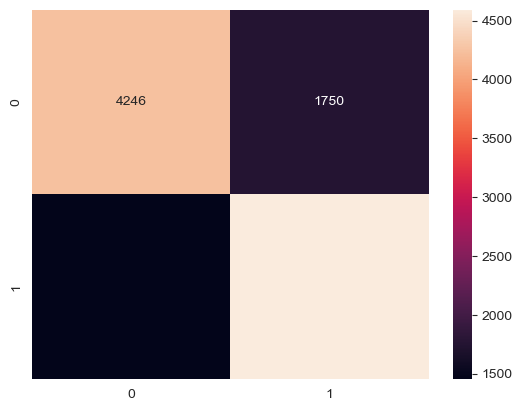

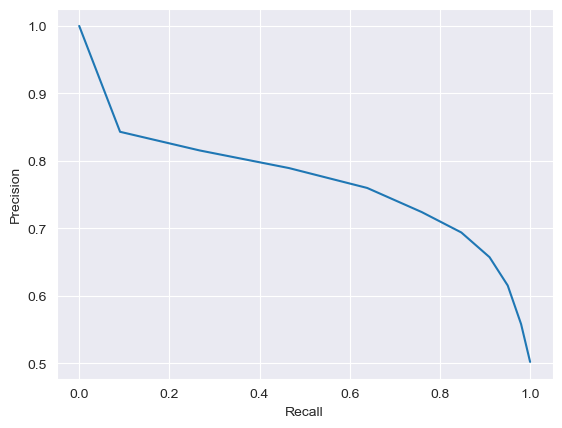

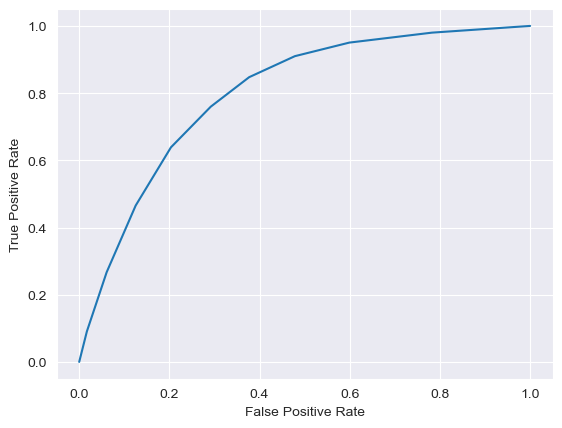

In [32]:
knn = KNeighborsClassifier()
knn_param_grid = {'n_neighbors': [3, 5, 7, 9], 'metric': ['euclidean', 'manhattan']}
knn_best = tune_hyperparameters(knn, knn_param_grid, X_train, y_train)
evaluate_model(knn_best, X_test, y_test)
plot_curves(knn_best, X_test, y_test)

# Decision Tree

Best parameters:  {'criterion': 'entropy'}
Best score:  0.665402283280814
              precision    recall  f1-score   support

           0       0.67      0.67      0.67      5996
           1       0.67      0.67      0.67      6044

    accuracy                           0.67     12040
   macro avg       0.67      0.67      0.67     12040
weighted avg       0.67      0.67      0.67     12040



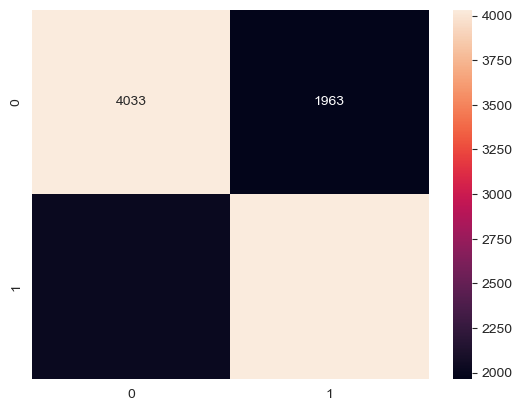

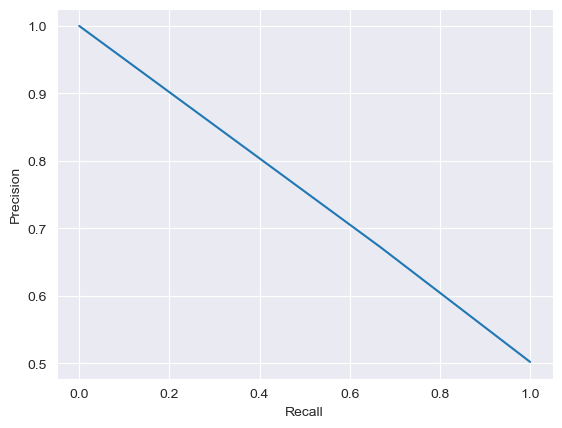

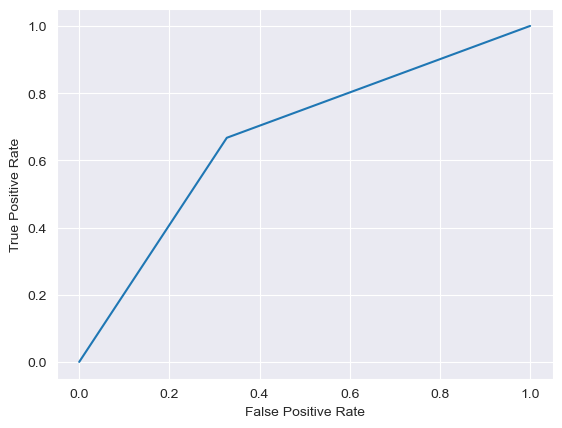

In [33]:
dt = DecisionTreeClassifier()
dt_param_grid = {'criterion': ['entropy', 'gini']}
dt_best = tune_hyperparameters(dt, dt_param_grid, X_train, y_train)
evaluate_model(dt_best, X_test, y_test)
plot_curves(dt_best, X_test, y_test)

# Logistic Regression

Best parameters:  {'max_iter': 1000, 'solver': 'saga'}
Best score:  0.7428982360550285
              precision    recall  f1-score   support

           0       0.76      0.70      0.72      5996
           1       0.72      0.78      0.75      6044

    accuracy                           0.74     12040
   macro avg       0.74      0.74      0.74     12040
weighted avg       0.74      0.74      0.74     12040



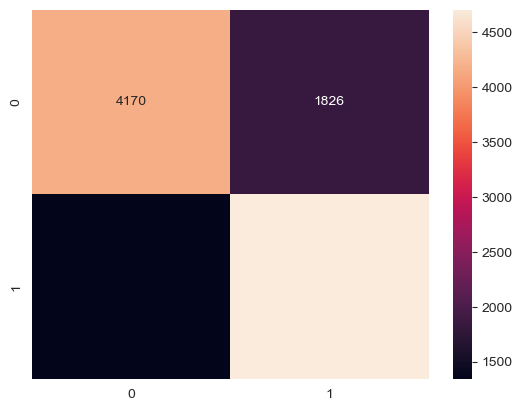

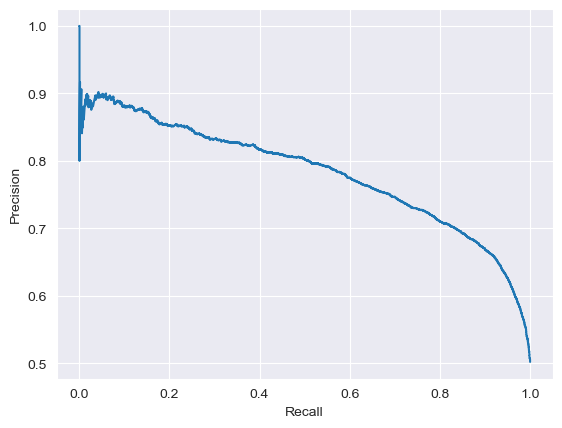

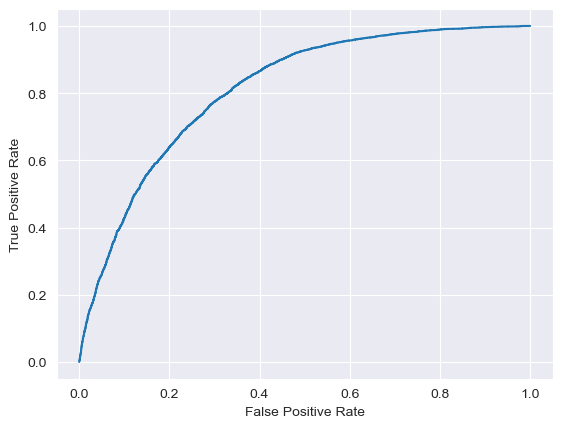

In [34]:
from sklearn.preprocessing import StandardScaler
# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Increase max_iter and change solver in Logistic Regression
lr = LogisticRegression(max_iter=1000, solver='liblinear')
lr_param_grid = {'max_iter': [1000, 2000, 3000], 'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}
lr_best = tune_hyperparameters(lr, lr_param_grid, X_train_scaled, y_train)
evaluate_model(lr_best, X_test_scaled, y_test)
plot_curves(lr_best, X_test_scaled, y_test)

# Support Vector Machine (SVM)
- Dataset too Large 
- Stuck on Execution

In [35]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# import SVC classifier
from sklearn.svm import SVC
# import metrics to compute accuracy
from sklearn.metrics import accuracy_score
# instantiate classifier with default hyperparameters
svc=SVC(kernel='rbf', C=0.1)
#timer start
import time
start = time.time()
# fit classifier to training set
svc.fit(X_train_scaled,y_train)
# make predictions on test set
y_pred=svc.predict(X_test_scaled)
#timer end
end = time.time()
# compute and print accuracy score
print('Model accuracy score with Kernel rbf and C=0.1: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))
print('Execution time: {0:0.1f} seconds '.format(end - start))

Model accuracy score with Kernel rbf and C=0.1: 0.7454
Execution time: 48.0 seconds 


In [36]:
import gc
del svc 
kernels = ['rbf', 'sigmoid','linear', 'poly']
Cs = [100, 10, 1.0, 0.1, 0.001]

best_kernel = ''
best_C = 0
highest_accuracy = 0

for kernel in kernels:
    for C in Cs:
        print("Kernel: ", kernel, "C: ", C)
        svm = SVC(kernel=kernel, C=C)
        svm.fit(X_train_scaled, y_train)
        y_pred = svm.predict(X_test_scaled)
        accuracy = accuracy_score(y_test, y_pred)
        print("  Accuracy: ", accuracy)
        if accuracy > highest_accuracy:
            best_kernel = kernel
            best_C = C
            highest_accuracy = accuracy
        print("------------------------------------------------------------\n ")
        # Delete the model and free up memory
        del svm
        gc.collect()

print("Best kernel: ", best_kernel)
print("Best C: ", best_C)
print("Highest accuracy: ", highest_accuracy)

Kernel:  rbf C:  100
  Accuracy:  0.7216777408637873
------------------------------------------------------------
 
Kernel:  rbf C:  10
  Accuracy:  0.7426910299003322
------------------------------------------------------------
 
Kernel:  rbf C:  1.0
  Accuracy:  0.7480897009966777
------------------------------------------------------------
 
Kernel:  rbf C:  0.1
  Accuracy:  0.7454318936877077
------------------------------------------------------------
 
Kernel:  rbf C:  0.001
  Accuracy:  0.7200996677740864
------------------------------------------------------------
 
Kernel:  sigmoid C:  100
  Accuracy:  0.6465116279069767
------------------------------------------------------------
 
Kernel:  sigmoid C:  10
  Accuracy:  0.6472591362126245
------------------------------------------------------------
 
Kernel:  sigmoid C:  1.0
  Accuracy:  0.647093023255814
------------------------------------------------------------
 
Kernel:  sigmoid C:  0.1
  Accuracy:  0.6598006644518273
----

## Model Evaluation and Comparison



K-Nearest Neighbors:
              precision    recall  f1-score   support

           0       0.75      0.71      0.73      5996
           1       0.72      0.76      0.74      6044

    accuracy                           0.73     12040
   macro avg       0.73      0.73      0.73     12040
weighted avg       0.73      0.73      0.73     12040



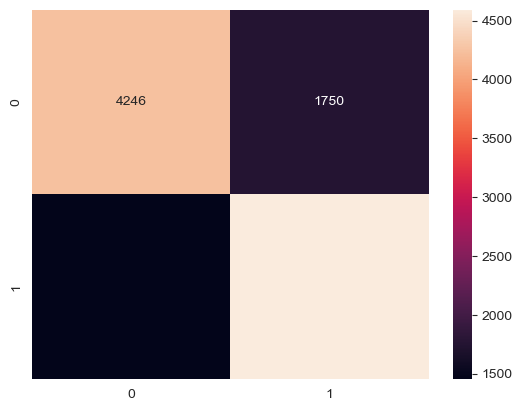

Decision Tree:
              precision    recall  f1-score   support

           0       0.67      0.67      0.67      5996
           1       0.67      0.67      0.67      6044

    accuracy                           0.67     12040
   macro avg       0.67      0.67      0.67     12040
weighted avg       0.67      0.67      0.67     12040



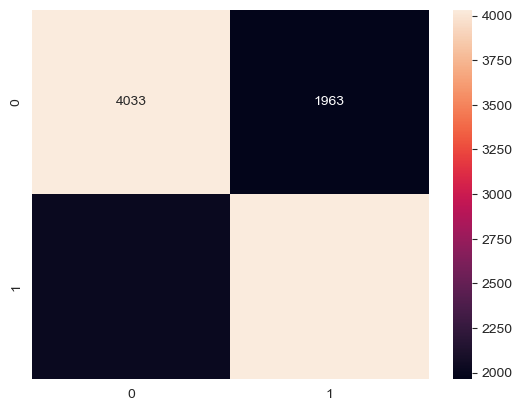

Logistic Regression:
              precision    recall  f1-score   support

           0       0.76      0.70      0.72      5996
           1       0.72      0.78      0.75      6044

    accuracy                           0.74     12040
   macro avg       0.74      0.74      0.74     12040
weighted avg       0.74      0.74      0.74     12040



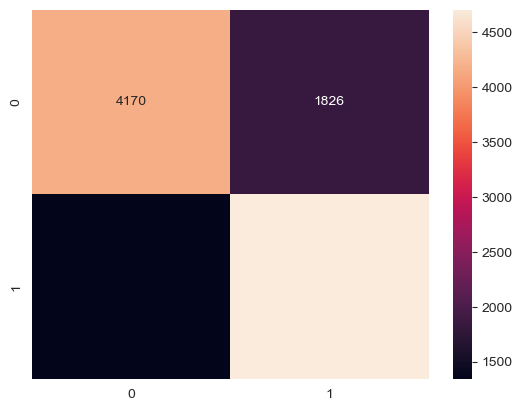

Support Vector Machine:
              precision    recall  f1-score   support

           0       0.79      0.67      0.73      5996
           1       0.72      0.82      0.77      6044

    accuracy                           0.75     12040
   macro avg       0.75      0.75      0.75     12040
weighted avg       0.75      0.75      0.75     12040



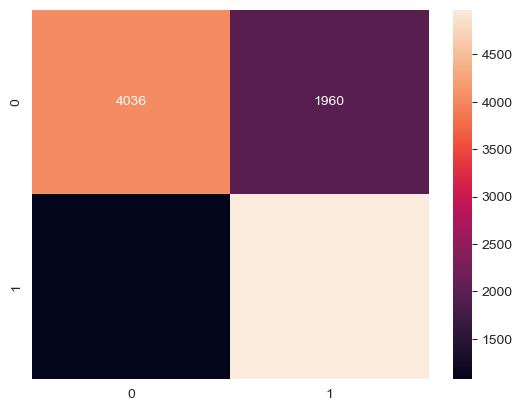

In [37]:
# Evaluate the models on the test set 
print("K-Nearest Neighbors:")
evaluate_model(knn_best, X_test, y_test)
print("Decision Tree:")
evaluate_model(dt_best, X_test, y_test)
print("Logistic Regression:")
evaluate_model(lr_best, X_test_scaled, y_test)
print("Support Vector Machine:")
svc = SVC(kernel=best_kernel, C=best_C,probability=True)
svc.fit(X_train_scaled, y_train)
evaluate_model(svc, X_test_scaled, y_test)

K-Nearest Neighbors:


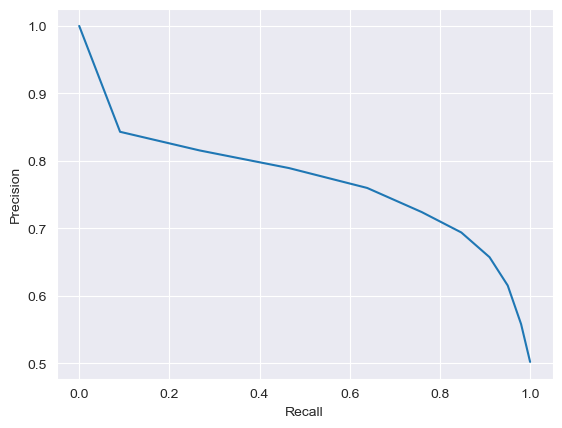

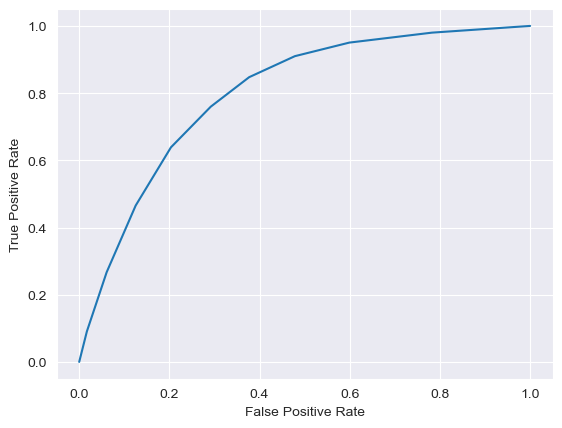

Decision Tree:


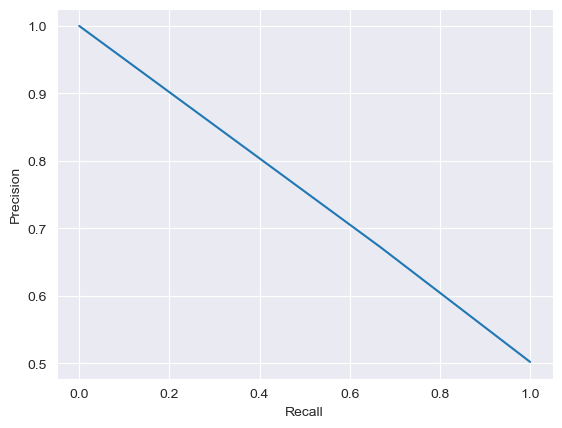

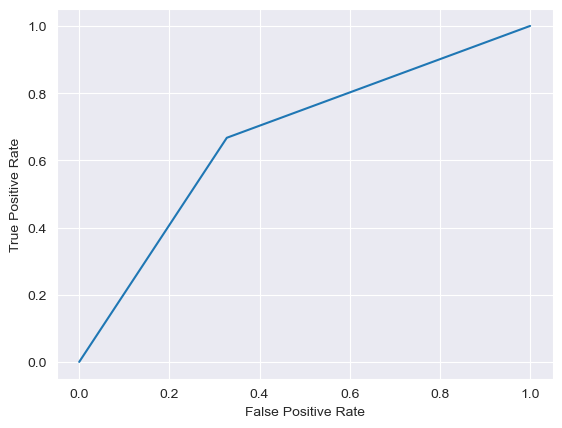

Logistic Regression:


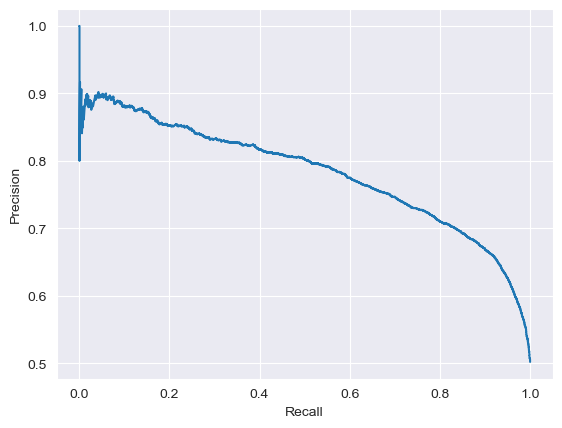

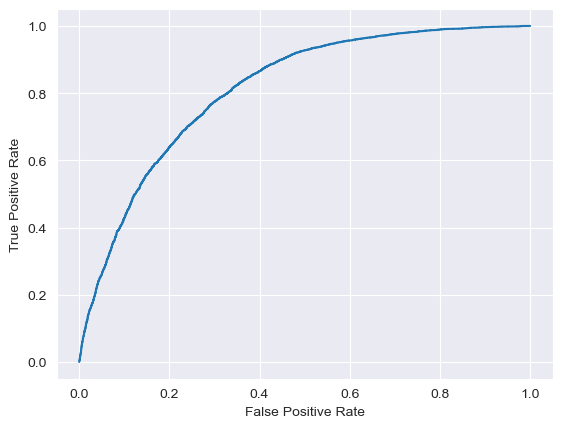

Support Vector Machine:


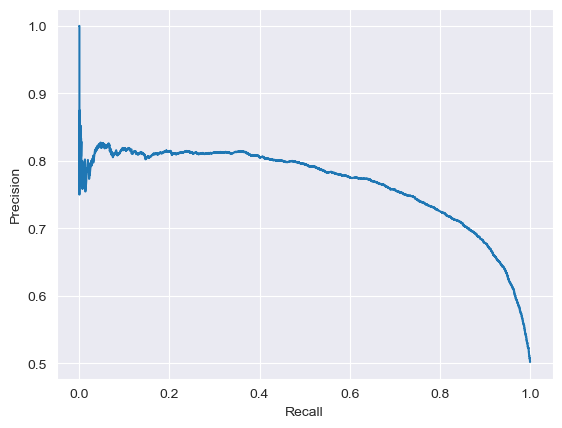

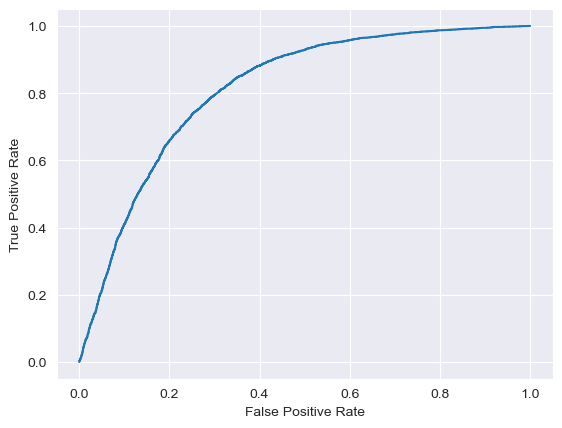

In [38]:
# Plot the Precision-Recall and ROC-AUC curves for the models 
print("K-Nearest Neighbors:")
plot_curves(knn_best, X_test, y_test)
print("Decision Tree:")
plot_curves(dt_best, X_test, y_test)
print("Logistic Regression:")
plot_curves(lr_best, X_test_scaled, y_test)
print("Support Vector Machine:")
plot_curves(svc, X_test_scaled, y_test)

## Conclusion


In [39]:
#Best model based on the evaluation metrics is The support vector machine 
print("Support Vector Machine:")
print("Kernel: ", best_kernel)
print("C: ", best_C)
cm=confusion_matrix(y_test, svc.predict(X_test_scaled))
print("Confusion Matrix: ")
print(cm)


Support Vector Machine:
Kernel:  rbf
C:  1.0
Confusion Matrix: 
[[4036 1960]
 [1073 4971]]


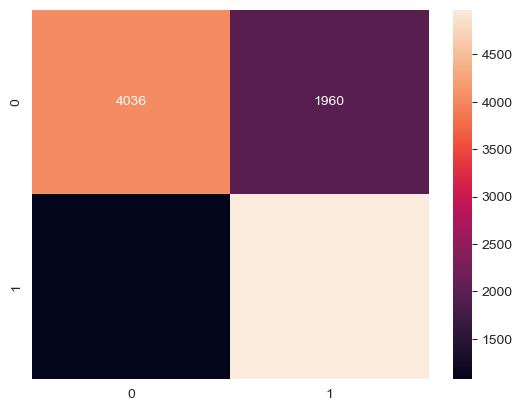

In [40]:
#The confusion matrix shows as a graph 
sns.heatmap(cm, annot=True, fmt='d')
plt.show()

# Save the best model


In [29]:
best_model = svc
import joblib
joblib.dump(best_model, 'models/best_model.pkl')

NameError: name 'svc' is not defined